# Dự đoán giá cổ phiếu sử dụng LSTM

## LSTM
- LSTM: là một phiên bản cải tiến của mạng nơ-ron tuần hoàn (RNN) nhằm giải quyết vấn đề nhớ các bước dài của RNN.

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('AAPL10K.csv')
print(data.shape)
# data.head()

(10633, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,12/16/1980,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,12/17/1980,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,12/18/1980,0.118862,0.119420,0.118862,0.118862,0.092351,73449600


In [3]:
# Importing the training set
data_end = int(np.floor(0.8*(data.shape[0])))
dataset_train = data[0:data_end]
print(dataset_train.shape)
# dataset_train.head()

(8506, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.099722,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.094519,175884800
2,12/16/1980,0.113281,0.113281,0.112723,0.112723,0.087582,105728000
3,12/17/1980,0.115513,0.116071,0.115513,0.115513,0.089749,86441600
4,12/18/1980,0.118862,0.119420,0.118862,0.118862,0.092351,73449600


In [4]:
training_set = dataset_train.iloc[:, 1:2].values
# training_set

array([[ 0.128348],
       [ 0.12221 ],
       [ 0.113281],
       ...,
       [25.715   ],
       [25.764999],
       [25.775   ]])

In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled
dataset_train.shape[0]

8506

In [6]:
# Creating a data structure with 30 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, dataset_train.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# print('X_train: ', X_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #reshape thành mảng 3 chiều
#(2150,2150,1)

# print('X_train: ', X_train)
# print('y_train: ', y_train)
# print('len(X_train) = ', len(X_train))
# print('len(y_train) = ', len(y_train))
# print('len(X_train[0]) = ', len(X_train[0]))

X_train:  [[[0.00305858]
  [0.00281998]
  [0.00247289]
  ...
  [0.00255966]
  [0.00219091]
  [0.00199566]]

 [[0.00281998]
  [0.00247289]
  [0.00255966]
  ...
  [0.00219091]
  [0.00199566]
  [0.00186552]]

 [[0.00247289]
  [0.00255966]
  [0.00268984]
  ...
  [0.00199566]
  [0.00186552]
  [0.00197397]]

 ...

 [[0.89518391]
  [0.9003206 ]
  [0.89893228]
  ...
  [0.98367368]
  [0.97978642]
  [0.98532571]]

 [[0.9003206 ]
  [0.89893228]
  [0.91865999]
  ...
  [0.97978642]
  [0.98532571]
  [0.99766767]]

 [[0.89893228]
  [0.91865999]
  [0.91282908]
  ...
  [0.98532571]
  [0.99766767]
  [0.99961124]]]
y_train:  [0.00186552 0.00197397 0.00195228 ... 0.99766767 0.99961124 1.        ]
len(X_train) =  8446
len(y_train) =  8446
len(X_train[0]) =  60


In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
# Initialising the RNN
regressor = Sequential() # lưu trữ các danh sách 

# Adding the first LSTM layer and some Dropout regularisation
#Dropout bỏ qua 20% unit bất kì
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#thuật toán tối ưu là thuật toán để cải thiện weight và bias theo từng bước
#adam thuật toán tối ưu tìm cực tiểu toàn cục

In [13]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
#Epochs: Một Epoch được tính là khi chúng ta đưa tất cả dữ liệu trong tập train vào mạng neural network 1 lần
#Batch size là số lượng mẫu dữ liệu trong một lần huấn luyện.

Epoch 1/100
264/264 [==============================] - 80s 252ms/step - loss: 0.0040
Epoch 2/100
264/264 [==============================] - 68s 258ms/step - loss: 0.0019
Epoch 3/100
264/264 [==============================] - 73s 277ms/step - loss: 0.0016
Epoch 4/100
264/264 [==============================] - 72s 274ms/step - loss: 0.0013
Epoch 5/100
264/264 [==============================] - 94s 354ms/step - loss: 0.0011
Epoch 6/100
264/264 [==============================] - 81s 308ms/step - loss: 0.0011
Epoch 7/100
264/264 [==============================] - 62s 237ms/step - loss: 0.0011
Epoch 8/100
264/264 [==============================] - 71s 271ms/step - loss: 9.1295e-04
Epoch 9/100
264/264 [==============================] - 68s 256ms/step - loss: 9.0501e-04
Epoch 10/100
264/264 [==============================] - 65s 245ms/step - loss: 0.0011
Epoch 11/100
264/264 [==============================] - 61s 231ms/step - loss: 9.8056e-04
Epoch 12/100
264/264 [=============================

264/264 [==============================] - 59s 225ms/step - loss: 4.5488e-04
Epoch 93/100
264/264 [==============================] - 59s 224ms/step - loss: 4.5996e-04
Epoch 94/100
264/264 [==============================] - 60s 226ms/step - loss: 4.7519e-04
Epoch 95/100
264/264 [==============================] - 59s 225ms/step - loss: 4.7080e-04
Epoch 96/100
264/264 [==============================] - 59s 225ms/step - loss: 4.7493e-04
Epoch 97/100
264/264 [==============================] - 59s 225ms/step - loss: 4.8046e-04
Epoch 98/100
264/264 [==============================] - 59s 225ms/step - loss: 4.5221e-04
Epoch 99/100
264/264 [==============================] - 59s 225ms/step - loss: 4.8450e-04
Epoch 100/100
264/264 [==============================] - 60s 226ms/step - loss: 4.7601e-04


In [14]:
# Part 3 - Making the predictions and visualising the results

# Getting the stock price
dataset_test = data[data_end:]
print(dataset_test.shape)
dataset_test


(2127, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
8506,9/4/2014,24.712500,25.022499,24.447500,24.530001,21.951704,342872000
8507,9/5/2014,24.700001,24.847500,24.577499,24.742500,22.141867,233828000
8508,9/8/2014,24.825001,24.827499,24.512501,24.590000,22.005386,185426800
8509,9/9/2014,24.770000,25.770000,24.035000,24.497499,21.922619,759385200
8510,9/10/2014,24.502501,25.277500,24.440001,25.250000,22.596024,403478400
...,...,...,...,...,...,...,...
10628,2/8/2023,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
10629,2/9/2023,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
10630,2/10/2023,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
10631,2/13/2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [15]:
real_stock_price = dataset_test.iloc[:, 1:2].values
# real_stock_price

In [16]:
# Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) #nối lại 2 tập dữ liệu
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# print(dataset_total)
# print(len(dataset_test))
# print(inputs)


inputs = inputs.reshape(-1,1) #đổi giá trị (-1,1)
inputs = sc.transform(inputs) #tranform
X_test = []
for i in range(60, dataset_test.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

65/65 [==============================] - 9s 59ms/step


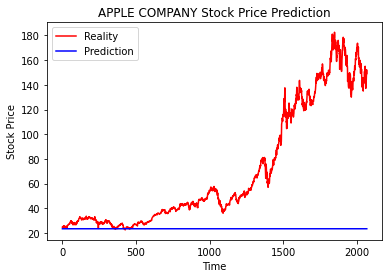

In [17]:
# Visualising the results
plt.plot(real_stock_price[:-60], color = 'red', label = 'Reality')
plt.plot(predicted_stock_price[:], color = 'blue', label = 'Prediction')
plt.title('APPLE COMPANY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
predicted_stock_price

array([[23.422718],
       [23.424236],
       [23.425583],
       ...,
       [23.44412 ],
       [23.44412 ],
       [23.444122]], dtype=float32)

In [19]:
real_stock_price


array([[ 24.7125  ],
       [ 24.700001],
       [ 24.825001],
       ...,
       [149.460007],
       [150.949997],
       [152.119995]])